In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


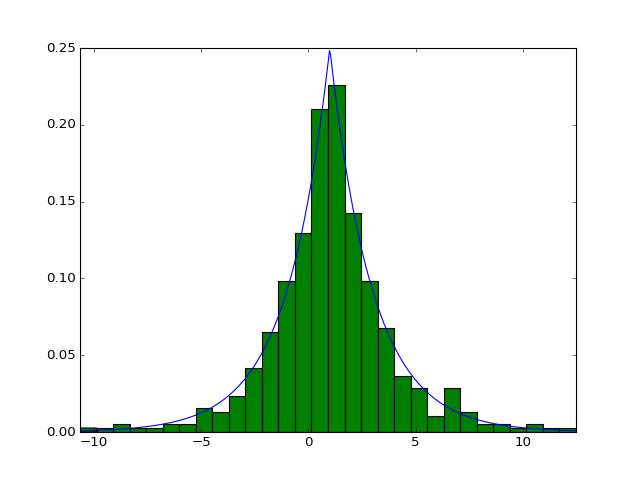

In [65]:
def p_X(x, µ=1, b=2):
    return 1 / (2 * b) * np.exp(-(np.abs(x - µ) / b))

def F_X_inv(y, µ=1, b=2):
    lower = np.log(2 * y) * b + µ
    upper = µ - np.log(-2 * y + 2) * b
    return (y < 0.5) * lower + (y >= 0.5) * upper

samples = F_X_inv(np.random.random(500))
min_, max_ = samples.min(), samples.max()
steps = np.linspace(min_, max_, 500)
density = p_X(steps)

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.plot(steps, density)
ax.set_xlim(min_, max_)
ax.hist(samples, normed=True, bins=30)
plt.show()